In [1]:
"""
CS353 - Machine Learning Lab
Lab5
Section 2
Name: Hardik L Harti
Roll number : 181CO220
Date : 02.03.2021
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
#load data
boston_data = datasets.load_boston()


In [3]:
# creating features
data = pd.DataFrame(boston_data.data)
data.columns = boston_data.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#adding target as a column to data
data['Price'] = boston_data.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
X=boston_data.data
y=boston_data.target
X.shape

(506, 13)

In [7]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Creating multiple linear regression model

In [8]:

lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
#predicting values for test data using the model
y_pred1=lr.predict(X_test)

## printing mean squared error for the predicted values

In [10]:
#
from sklearn.metrics import mean_squared_error
error1 = mean_squared_error(y_test, y_pred1)
print("Mean Square Error(Multi linear regression): ", error1)

Mean Square Error(Multi linear regression):  27.195965766883234


# Defining a function for knn regressor

In [11]:

from sklearn.neighbors import KNeighborsRegressor
def knearest(x):
    knn = KNeighborsRegressor(n_neighbors=x)
    knn.fit(X_train,y_train)
    y_pred2=knn.predict(X_test)
    error2 = mean_squared_error(y_test, y_pred2)
    return error2
    

## Predicting the mean squared error for different values of k from 2-15

In [12]:

minv=101
mini=0
for i in range(2,16):
    error2=knearest(i)
    print("Mean Square Error(K=",i,"): ", error2)
    if error2<minv:
        minv=error2
        mini=i

Mean Square Error(K= 2 ):  42.038519736842105
Mean Square Error(K= 3 ):  37.08989035087719
Mean Square Error(K= 4 ):  38.23266858552631
Mean Square Error(K= 5 ):  40.246544736842104
Mean Square Error(K= 6 ):  42.72847770467836
Mean Square Error(K= 7 ):  43.84878088077337
Mean Square Error(K= 8 ):  45.15848581414474
Mean Square Error(K= 9 ):  43.58472465886939
Mean Square Error(K= 10 ):  44.95649802631579
Mean Square Error(K= 11 ):  44.269074597651155
Mean Square Error(K= 12 ):  45.781298428362575
Mean Square Error(K= 13 ):  45.98815633758953
Mean Square Error(K= 14 ):  47.916211399033294
Mean Square Error(K= 15 ):  48.76322573099415


In [13]:
#using the k value with min error to predict
knn = KNeighborsRegressor(n_neighbors=mini)
knn.fit(X_train,y_train)
y_pred2=knn.predict(X_test)


# Plotting a graph

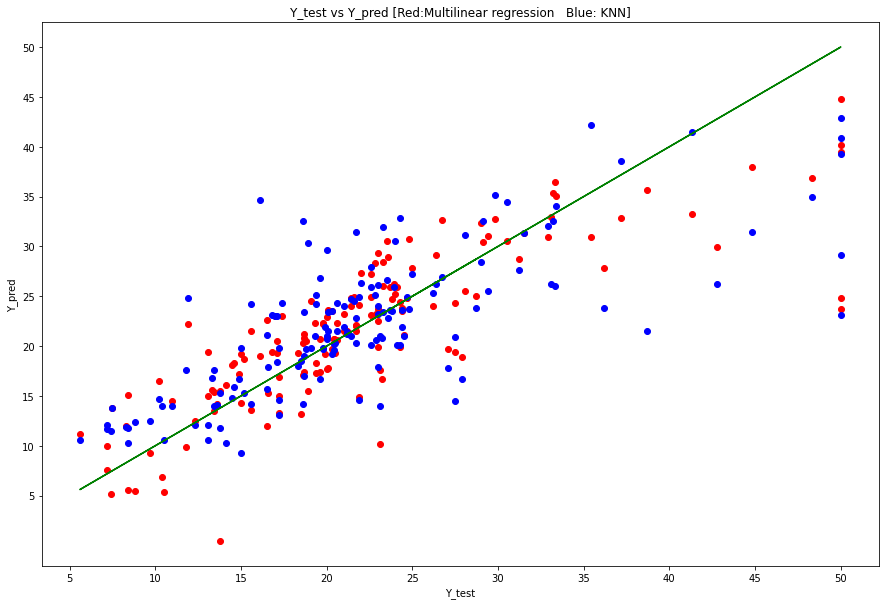

In [14]:
#
#fig, axe = plt.subplots(dpi = 300)
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred1, color = 'red')
plt.scatter(y_test, y_pred2, color = 'blue')
plt.plot(y_test,y_test, color = "green")
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title('Y_test vs Y_pred [Red:Multilinear regression   Blue: KNN]')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.yticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

plt.show()
#plt.savefig('linear_reg.png')